In [0]:
from keras.datasets import mnist
import keras
import numpy as np

In [0]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()


In [31]:
X_train[0].shape

(28, 28)

In [0]:
def generate_idxs(X):
    idxs1=np.random.randint(0,len(X),1)[0]
    return idxs1

def same_label_index(X,Y):

  while True:
    idx1=generate_idxs(X)
    idx2=generate_idxs(X)

    if Y[idx1]==Y[idx2]:
      break

  return idx1,idx2

def different_label_index(X,Y):
  while True:
    idx1=generate_idxs(X)
    idx2=generate_idxs(X)
    if Y[idx1]!=Y[idx2]:
      break

  return idx1,idx2

def batch_generator_train(X,Y,batch_size):
  while True:
    data=[np.zeros((batch_size,28,28,1)) for i in range(2)]
    tar=[np.zeros((batch_size,))]
    
    #Same pairs.
    for i in range(0,batch_size//2):
      idx1,idx2=same_label_index(X,Y)
      dig1=np.expand_dims(X[idx1],axis=-1)
      dig2=np.expand_dims(X[idx2],axis=-1)

      data[0][i,:,:,:]=dig1
      data[1][i,:,:,:]=dig2
      tar[0][i]=1

    #Different pairs
    for j in range(batch_size//2,batch_size):
      idx1,idx2=different_label_index(X,Y)
      dig1=np.expand_dims(X[idx1],axis=-1)
      dig2=np.expand_dims(X[idx2],axis=-1)

      data[0][j,:,:,:]=dig1
      data[1][j,:,:,:]=dig2
      tar[0][j]=0
  
    yield data,tar

def batch_generator_test(X,Y,batch_size):
  while True:
    data=[np.zeros((batch_size,28,28,1)) for i in range(2)]
    tar=[np.zeros((batch_size,))]
    
    #Same pairs.
    for i in range(0,batch_size//2):
      idx1,idx2=same_label_index(X,Y)
      dig1=np.expand_dims(X[idx1],axis=-1)
      dig2=np.expand_dims(X[idx2],axis=-1)

      data[0][i,:,:,:]=dig1
      data[1][i,:,:,:]=dig2
      tar[0][i]=1

    #Different pairs
    for j in range(batch_size//2,batch_size):
      idx1,idx2=different_label_index(X,Y)
      dig1=np.expand_dims(X[idx1],axis=-1)
      dig2=np.expand_dims(X[idx2],axis=-1)

      data[0][j,:,:,:]=dig1
      data[1][j,:,:,:]=dig2
      tar[0][j]=0
  
    yield data,tar






  
  
  



   






   


In [0]:
X_tr,y_tr=next(batch_generator_train(X_train,y_train,10))

In [74]:
y_tr[0][5]

0.0

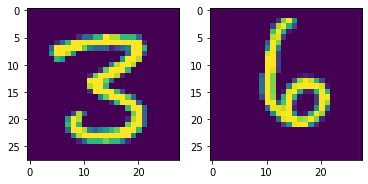

In [69]:
import matplotlib.pyplot as plt
f = plt.figure()
f.add_subplot(1,2, 1)
img1=X_tr[0][5,:,:,:]
img1=np.squeeze(img1,axis=2)
plt.imshow(img1)

f.add_subplot(1,2, 2)
img2=X_tr[1][5,:,:,:]
img2=np.squeeze(img2,axis=2)
plt.imshow(img2)

plt.show(block=True)


In [0]:
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPool2D,Dense,GlobalAvgPool2D,Lambda,Input,Dropout
import keras.backend as K
def build_model(input_shape):

 model=Sequential()
 model.add(Conv2D(32,(5,5),input_shape=input_shape,activation='relu'))
 model.add(Dropout(0.1))
 model.add(MaxPool2D(2,2))
 

 model.add(Conv2D(64,(3,3),activation='relu'))
 model.add(Dropout(0.2))
 model.add(MaxPool2D(2,2))

 model.add(Conv2D(64,(3,3),activation='relu'))
 model.add(Dropout(0.1))
 model.add(MaxPool2D(2,2))

 model.add(GlobalAvgPool2D())
 
 input1=Input(input_shape)
 input2=Input(input_shape)
 
 encoder_l=model(input1)
 encoder_r=model(input2)

 L1_layer = Lambda(lambda tensors:K.abs(tensors[0] - tensors[1]))
 L1_distance = L1_layer([encoder_l, encoder_r])

 output=Dense(1,activation='sigmoid')(L1_distance)
 siamese=Model(inputs=[input1,input2],outputs=output)

 return siamese





In [0]:
from keras.optimizers import Adam
siamese_model=build_model((28,28,1))
siamese_model.compile(loss='binary_crossentropy',optimizer=Adam(lr=0.001))


In [97]:
history=siamese_model.fit_generator(batch_generator_train(X_train,y_train,2),steps_per_epoch=150,validation_data=batch_generator_test(X_test,y_test,2),
                                    validation_steps=50,epochs=50,shuffle=True)

Epoch 1/50
150/150 [==============================] - 4s 28ms/step - loss: 4.9719 - val_loss: 2.1934
Epoch 2/50
150/150 [==============================] - 2s 11ms/step - loss: 2.9071 - val_loss: 1.8108
Epoch 3/50
150/150 [==============================] - 2s 11ms/step - loss: 2.9638 - val_loss: 1.5178
Epoch 4/50
150/150 [==============================] - 2s 11ms/step - loss: 1.9713 - val_loss: 1.1874
Epoch 5/50
150/150 [==============================] - 2s 11ms/step - loss: 1.0383 - val_loss: 0.8961
Epoch 6/50
150/150 [==============================] - 2s 11ms/step - loss: 1.0616 - val_loss: 0.6237
Epoch 7/50
150/150 [==============================] - 2s 11ms/step - loss: 1.0250 - val_loss: 0.5853
Epoch 8/50
150/150 [==============================] - 2s 11ms/step - loss: 1.1807 - val_loss: 0.6836
Epoch 9/50
150/150 [==============================] - 2s 11ms/step - loss: 0.7360 - val_loss: 0.5753
Epoch 10/50
150/150 [==============================] - 2s 11ms/step - loss: 0.7339 - val_lo

In [103]:
idx1,idx2=same_label_index(X_test,y_test)
X1=[np.zeros((1,28,28,1)) for i in range(2)]
X1[0][0,:,:,:]=np.expand_dims(X_test[idx1],axis=-1)
X1[1][0,:,:,:]=np.expand_dims(X_test[idx2],axis=-1)

idx1,idx2=different_label_index(X_test,y_test)
X2=[np.zeros((1,28,28,1)) for i in range(2)]
X2[0][0,:,:,:]=np.expand_dims(X_test[idx1],axis=-1)
X2[1][0,:,:,:]=np.expand_dims(X_test[idx2],axis=-1)

print(siamese_model.predict(X1))
print(siamese_model.predict(X2))

[[0.75682765]]
[[0.21019356]]
